In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('titanic/train.csv')

In [5]:
test_data = pd.read_csv('titanic/test.csv')

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [10]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [11]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [12]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [13]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [14]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [60]:
X_train_Orig = preprocess_pipeline.fit_transform(train_data)

In [63]:
X_train_df = pd.DataFrame(X_train_Orig, columns=train_data.columns)

In [64]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    float64
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    float64
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    float64
dtypes: float64(12)
memory usage: 83.7 KB


In [67]:
X_train = X_train_df.drop(['PassengerId', 'Name', 'Ticket','Cabin', 'Survived'], axis=1)

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    float64
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Parch     891 non-null    float64
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(7)
memory usage: 48.9 KB


In [69]:
#list(train_data.columns) 
y_train = train_data["Survived"]

In [70]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
from sklearn.model_selection import cross_val_score
knnscores = cross_val_score(neigh, X_train, y_train, cv=10)
knnscores.mean()

0.7833957553058678

In [72]:
from sklearn.model_selection import cross_val_predict
#calculate confusion matrix using sklrearn cross val predict
y_train_pred = cross_val_predict(neigh, X_train, y_train, cv=3)

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[487,  62],
       [122, 220]], dtype=int64)

In [74]:
#using SVM
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [75]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#calculate confusion matrix using sklrearn cross val predict
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[493,  56],
       [117, 225]], dtype=int64)

In [76]:
svc_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svc_scores.mean()

0.7968664169787766

In [77]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8035705368289637

In [78]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#calculate confusion matrix using sklrearn cross val predict
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[500,  49],
       [134, 208]], dtype=int64)

In [80]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
X_train

AttributeError: 'numpy.ndarray' object has no attribute 'info'

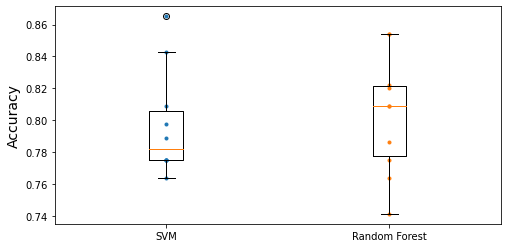

In [79]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svc_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svc_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [87]:
X_test_Orig = preprocess_pipeline.fit_transform(test_data)
X_test_df = pd.DataFrame(X_test_Orig, columns=train_data.columns)

In [88]:
X_test = X_test_df.drop(['PassengerId', 'Name', 'Ticket','Cabin', 'Survived'], axis=1)

In [90]:
y_pred = forest_clf.predict(X_test)

In [91]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived': y_pred})
output.to_csv('submission.csv', index=False)